# Understanding School Performance on Pennsylvania Standardized Tests

## Exploratory Data Analysis

The exploratory data analysis stage of this project will be driven by questions regarding the data, the distributions of features, and the relationships of the features with our target variables.

The first part of the EDA will be done here in this notebook, using Python packages such as matplotlib.pyplot and seaborn.

The second part of the EDA will be done in Tableau. The link to the slides/dashboards on Tableau Public is included below, and the Tableau workbook file is included in the GitHub repository for this project.

Why did I split up the EDA like this?

### <u>Questions</u>

The following questions will be explored in this notebook:

- From which sources do schools tend to spend more money per student? Local, state, or federal?

- Do schools tend to spend more money per student on Personnel or Non-Personnel?

The following questions will be explored in <b>Tableau</b>:

- How does attendance relate to school performance on Math and ELA?

- Does gender make-up have any correlation with school performance on Math and ELA?

- How do racial/ethnic compositions of schools relate to school performance on Math and ELA?
    - American Indian/Alaskan Native
    - Asian
    - Black/African American
    - Hispanic
    - Native Hawaiian or other Pacific Islander
    - White
    - 2 or More Races   

- How do socioeconomic demographics of schools relate to school performance on Math and ELA?
    - Title I School
    - Economically Disadvantaged
    - Foster Care
    - Homeless

- What is the relationship between expenditures and school performance on Math and ELA?
    - Local - Non-Personnel 
    - Local - Personnel
    - Total Local Expenditure
    - State - Non-Personnel
    - State - Personnel
    - Total State Expenditure
    - Federal - Non-Personnel
    - Federal - Personnel
    - Total Federal Expenditure
    - Total Non-Personnel Expenditure
    - Total Personnel Expenditure
    - Total Expenditure

- How do Title I schools' expenditures compare to non-Title I schools?  Do they have higher federal expenditures and lower local expenditures per student compared to non-Title I schools?  What about their total expenditures?

- What is the racial demographic make up of Title I schools vs non-Title I schools?

- Do schools with higher percentages of white students have higher local expenditures?

- How do do the different learning style compositions of schools relate to school performance on Math and ELA?
    - English Learner
    - Special Education
    - Percent of Gifted Students

- Across the state of PA, where do we see more schools with higher performance?
    - How does this compare to locations where school spend more money?
    - How does this compare with racial/socioeconomic demographic distributions across schools in PA?


### Contents:
1. Import packages and load data
2. Feature engineering expenditures
3. Distributions and summary statistics
4. Examining expenditures
5. Correlation heatmap
6. Tableau exploration
7. Findings

## 1. Import packages and load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load cleaned data from csv file
df = pd.read_csv('../Data/school_data_1819.csv', index_col = 0)

In [3]:
#check datatypes
df.dtypes

SchoolName                                                             object
SchoolNumber                                                            int64
School Zip Code                                                         int64
DistrictName                                                           object
AUN                                                                     int64
Title I School                                                         object
School Enrollment                                                       int64
Male (School)                                                         float64
Female (School)                                                       float64
Percent Regular Attendance (All Student)                              float64
American Indian/Alaskan Native                                        float64
Asian                                                                 float64
Black/African American                                          

The following columns are not numeric features, so we will convert them to objects:
- SchoolNumber
- School Zip Code
- AUN

In [4]:
#convert columns to object
cols = ['SchoolNumber',
        'School Zip Code',
        'AUN']

for col in cols:
    df[col]=df[col].astype(str)

In [5]:
#check dtypes again
df.dtypes

SchoolName                                                             object
SchoolNumber                                                           object
School Zip Code                                                        object
DistrictName                                                           object
AUN                                                                    object
Title I School                                                         object
School Enrollment                                                       int64
Male (School)                                                         float64
Female (School)                                                       float64
Percent Regular Attendance (All Student)                              float64
American Indian/Alaskan Native                                        float64
Asian                                                                 float64
Black/African American                                          

## 2. Feature engineering expenditures

We have six features that correspond to expenditures per student from various sources:

- <b>Local - Non-Personnel</b>
- <b>Local - Personnel</b>
- <b>State - Non-Personnel</b>
- <b>State - Personnel</b>
- <b>Federal - Non-Personnel</b>
- <b>Federal - Personnel</b>
    
From this, we'll combine expenditures from the same sources (i.e. add <b>Local - Non-Personnel</b> and <b>Local - Personnel</b> to create <b>Total Local Expenditures</b>).  We'll also add up all expenditures to create <b>Total Expenditures</b>.  We'll also add up all expenditures for Personnel and Non-Personnel.

In [6]:
#add up expenditures from the same source
df['Total Local Expenditure'] = df['Local - Non-Personnel'] + df['Local - Personnel']
df['Total State Expenditure'] = df['State - Non-Personnel'] + df['State - Personnel']
df['Total Federal Expenditure'] = df['Federal - Non-Personnel'] + df['Federal - Personnel']

#add up expenditures for Personnel and Non-Personnel
df['Total Non-Personnel Expenditure'] = df['Local - Non-Personnel'] + df['State - Non-Personnel'] + df['Federal - Non-Personnel']
df['Total Personnel Expenditure'] = df['Local - Personnel'] + df['State - Personnel'] + df['Federal - Personnel']

#add up for grand total expenditure
df['Total Expenditure'] = df['Total Local Expenditure'] + df['Total State Expenditure'] + df['Total Federal Expenditure']

In [7]:
# list of reordered columns

ordered_cols = ['SchoolName', 
                'SchoolNumber',
                'School Zip Code',
                'DistrictName', 
                'AUN', 
                
                'Title I School',
                'School Enrollment',
                
                'Male (School)',
                'Female (School)',
                
                'Percent Regular Attendance (All Student)',
                
                'American Indian/Alaskan Native', 
                'Asian', 
                'Black/African American',
                'Hispanic',
                'Native Hawaiian or other Pacific Islander',
                'White',
                '2 or More Races',
                
                'English Learner',
                'Special Education',
                'Percent of Gifted Students',
                
                'Economically Disadvantaged',
                'Foster Care',
                'Homeless',
                'Military Connected',
                
                'Local - Non-Personnel', 
                'Local - Personnel',
                'Total Local Expenditure',
                'State - Non-Personnel', 
                'State - Personnel',
                'Total State Expenditure',
                'Federal - Non-Personnel',
                'Federal - Personnel', 
                'Total Federal Expenditure',
                
                'Total Non-Personnel Expenditure',
                'Total Personnel Expenditure',
                
                'Total Expenditure',
                
                'Percent Proficient or Advanced ELA/Literature (All Student)',
                'Percent Proficient or Advanced Mathematics/Algebra 1 (All Student)'
               ]

In [8]:
# reorder columns of df using the list above
df=df[ordered_cols]

## 3. Distributions and Summary Statistics

In [9]:
#obtain summary statistics for each numeric feature
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
School Enrollment,2673.0,601.311261,465.089134,46.00,362.00,501.00,703.00,10100.00
Male (School),2673.0,51.358178,3.632378,0.12,49.76,51.47,53.07,100.00
Female (School),2673.0,48.641848,3.632382,0.00,46.93,48.53,50.24,99.88
Percent Regular Attendance (All Student),2673.0,86.206958,11.733701,7.50,81.90,89.80,94.30,100.00
American Indian/Alaskan Native,2673.0,0.153345,0.260724,0.00,0.00,0.00,0.23,2.91
Asian,2673.0,3.342450,5.797884,0.00,0.34,1.13,3.82,69.08
Black/African American,2673.0,14.937321,24.928654,0.00,1.24,3.67,13.52,100.00
Hispanic,2673.0,10.492806,16.733130,0.00,1.70,4.12,10.62,99.16
Native Hawaiian or other Pacific Islander,2673.0,0.084516,0.192109,0.00,0.00,0.00,0.10,2.12
White,2673.0,66.758451,31.950044,0.00,49.64,80.38,91.83,100.00


As a reminder, there are three expenditure columns that have negative values as the minimum value.  

    Local - Non-Personnel
    State - Non-Personnel
    Federal - Non-Personnel

Since we do not understand the significance of these negative values, and we are unsure as to whether these are errors or correct, we will leave this values as is.

Next, we'll look at the distributions of each of our numeric features.

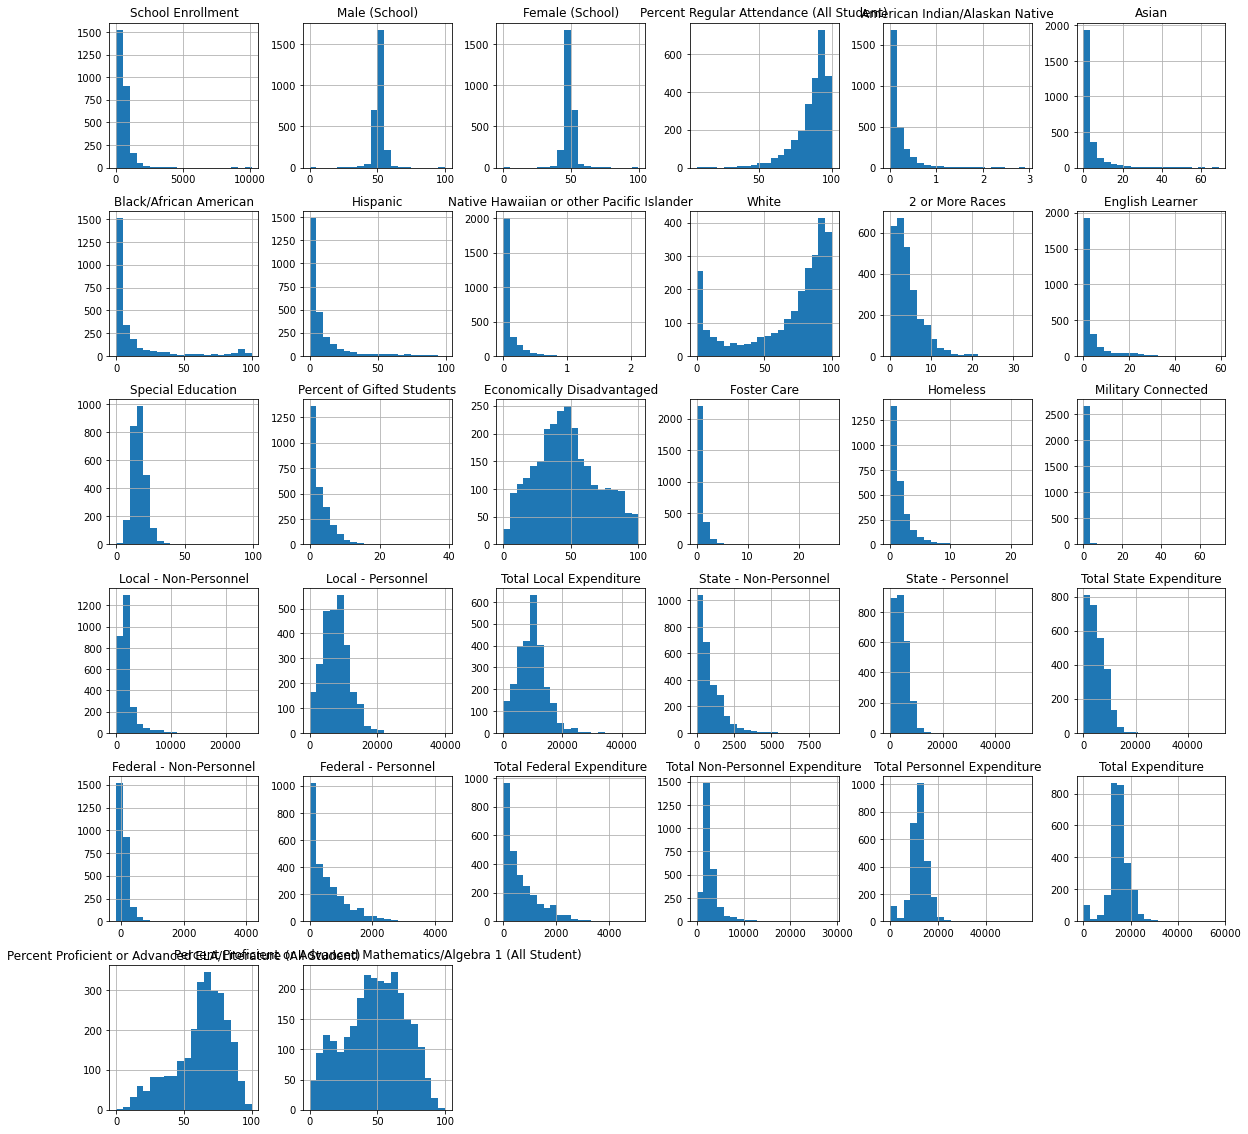

In [10]:
#construct histogram of every numeric feature
df.hist(figsize=(20,20), bins = 20)
plt.show()

## 4. Examining expenditures

We'll address the following questions here:
- From which sources do schools tend to spend more money per student? Local, state, or federal?
- Do schools tend to spend more money per student on Personnel or Non-Personnel?

We'll first calculate the mean and median of each group, and then we'll look at the distributions/boxplots.

In [21]:
# create list of columns to filter df
source_cols = ['Total Local Expenditure', 'Total State Expenditure', 'Total Federal Expenditure']

# filter df and get summary statistics
df[source_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Total Local Expenditure,2673.0,9559.625960,4746.558766,0.0,6310.65,9619.81,12342.04,45603.88
Total State Expenditure,2673.0,4583.380860,3766.726349,0.0,564.16,4273.48,7098.06,51817.55
Total Federal Expenditure,2673.0,669.644863,695.674432,0.0,137.21,444.50,992.15,5114.33


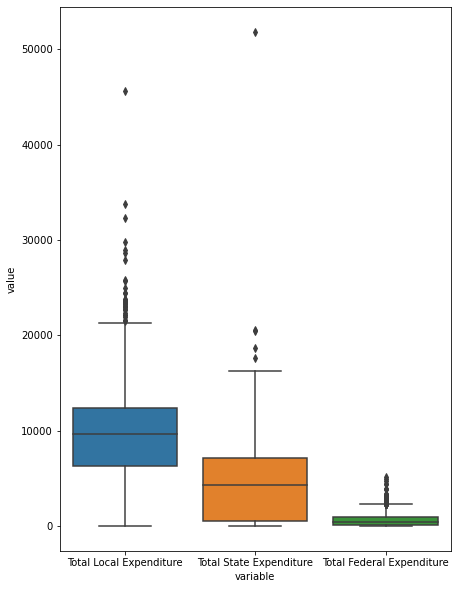

In [33]:
# plot boxplots 
plt.subplots(figsize=(7, 10))
sns.boxplot(x="variable", y="value", data=pd.melt(df[source_cols]))
plt.show()

On average, schools seem to spend the most amount of money from local sources, then state sources, then federal sources.

In [34]:
# create list of columns to filter df
personnel_cols = ['Total Non-Personnel Expenditure', 'Total Personnel Expenditure']

# filter df and get summary statistics
df[personnel_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Total Non-Personnel Expenditure,2673.0,2785.177669,1918.391149,0.0,1891.30,2368.13,3281.80,28810.48
Total Personnel Expenditure,2673.0,12027.474014,3980.549358,0.0,10373.81,12021.37,14086.46,56526.15


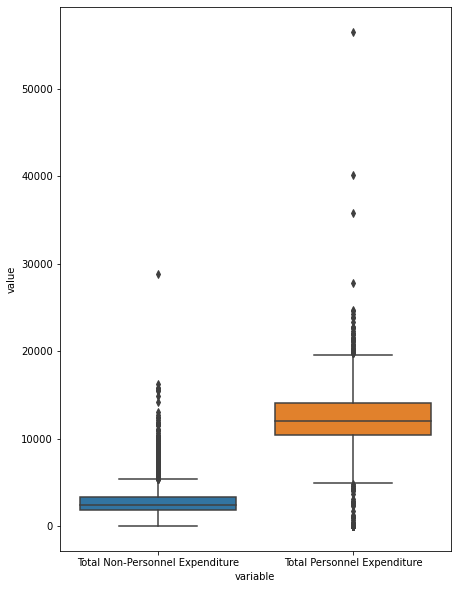

In [35]:
# plot boxplots 
plt.subplots(figsize=(7, 10))
sns.boxplot(x="variable", y="value", data=pd.melt(df[personnel_cols]))
plt.show()

On average, schools spend more money per student on Personnel than Non-Personnel. This may be due to the fact that salaries are a significantly larger cost to schools compared to Non-Personnel related expenditures such as materials, books, school building maintenance, etc.

## 5. Correlation heatmap

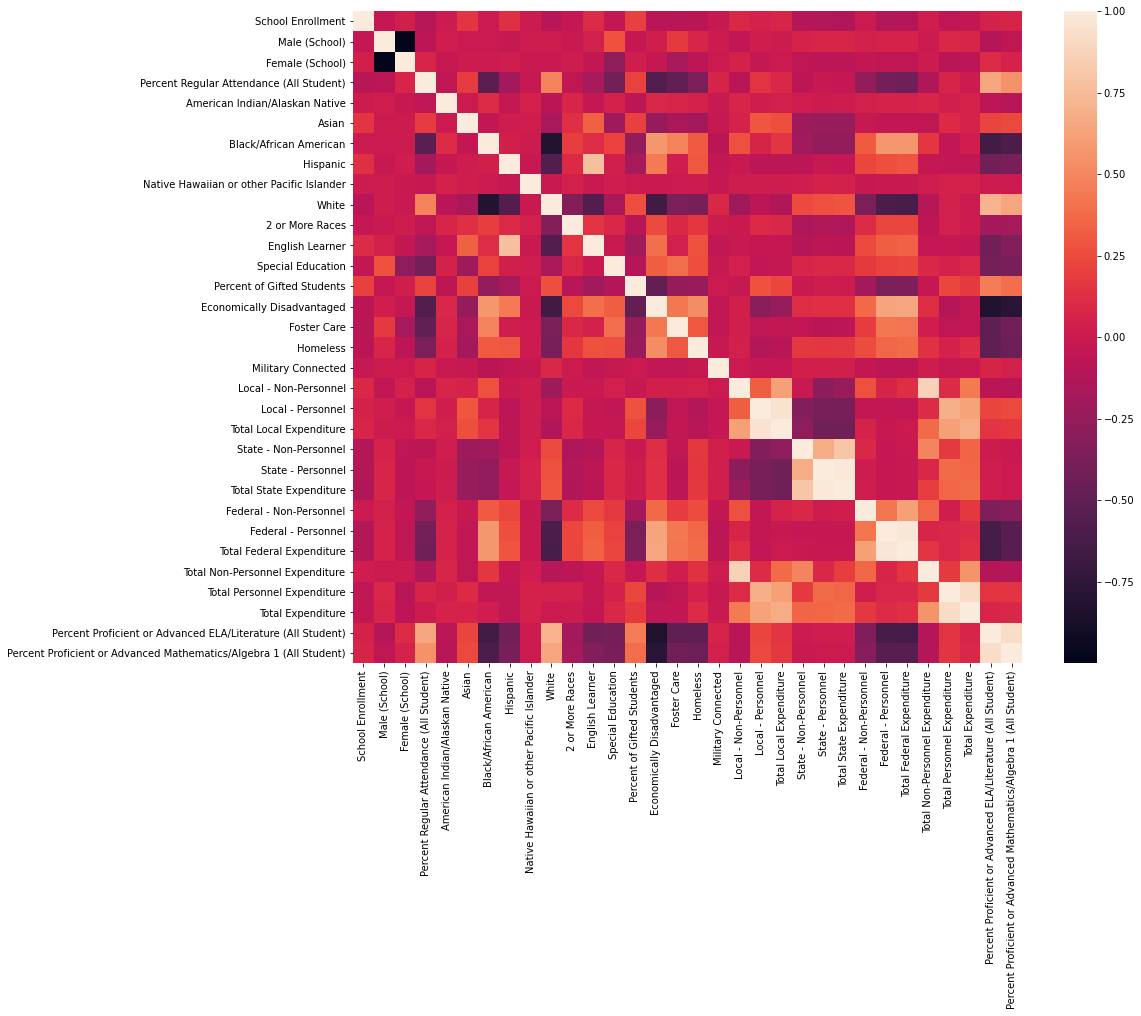

In [12]:
#construct a heatmap of correlation coefficients
plt.subplots(figsize=(15,12))
sns.heatmap(df.corr())
plt.show()

In [13]:
df.corr()['Percent Proficient or Advanced ELA/Literature (All Student)'].sort_values(ascending=False)

Percent Proficient or Advanced ELA/Literature (All Student)           1.000000
Percent Proficient or Advanced Mathematics/Algebra 1 (All Student)    0.923179
White                                                                 0.710579
Percent Regular Attendance (All Student)                              0.642519
Percent of Gifted Students                                            0.453533
Local - Personnel                                                     0.222784
Asian                                                                 0.222755
Total Local Expenditure                                               0.154362
Total Personnel Expenditure                                           0.141492
Female (School)                                                       0.102218
Total Expenditure                                                     0.074267
Military Connected                                                    0.062552
School Enrollment                                   

In [14]:
df.corr()['Percent Proficient or Advanced Mathematics/Algebra 1 (All Student)'].sort_values(ascending=False)

Percent Proficient or Advanced Mathematics/Algebra 1 (All Student)    1.000000
Percent Proficient or Advanced ELA/Literature (All Student)           0.923179
White                                                                 0.641710
Percent Regular Attendance (All Student)                              0.553432
Percent of Gifted Students                                            0.390356
Asian                                                                 0.239192
Local - Personnel                                                     0.238133
Total Local Expenditure                                               0.168860
Total Personnel Expenditure                                           0.154529
Total Expenditure                                                     0.085375
School Enrollment                                                     0.066396
Female (School)                                                       0.059650
Military Connected                                  

Strong positive correlation with target variables:
- White
- Percent Regular Attendance (All Student)
- Percent of Gifted Students
- Asian
- Local - Personnel

Strong negative correlation with target variables:
- Economically Disadvantaged
- Black/African American
- Total Federal Expenditure
- Federal - Personnel
- Homeless
- Foster Care
- Hispanic
- English Learner
- Special Education
- Federal - Non-Personnel

## 6. Tableau Exploration

In [ ]:
#save the current dataframe for use in Tableau.

## 7. Findings

On average, schools seem to spend the most amount of money from local sources, then state sources, then federal sources.

On average, schools spend more money per student on Personnel than Non-Personnel. This may be due to the fact that salaries are a significantly larger cost to schools compared to Non-Personnel related expenditures such as materials, books, school building maintenance, etc.